In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Step 1: Load dataset
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

In [3]:
# Step 2: Apply K-Means
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

In [4]:
# Step 3: Evaluate performance
inertia = kmeans.inertia_  # Sum of squared distances (compactness)
sil_score = silhouette_score(X, labels)  # Measure of clustering quality

In [5]:
print("K-Means Clustering Results")
print("---------------------------")
print(f"Number of clusters (k): {k}")
print(f"Inertia: {inertia:.3f}")
print(f"Silhouette Score: {sil_score:.3f}")

K-Means Clustering Results
---------------------------
Number of clusters (k): 3
Inertia: 78.851
Silhouette Score: 0.553


In [6]:
# Step 4: Display cluster centers
# ---------------------------
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
print("\nCluster Centers:")
print(centers)


Cluster Centers:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.901613          2.748387           4.393548          1.433871
1           5.006000          3.428000           1.462000          0.246000
2           6.850000          3.073684           5.742105          2.071053


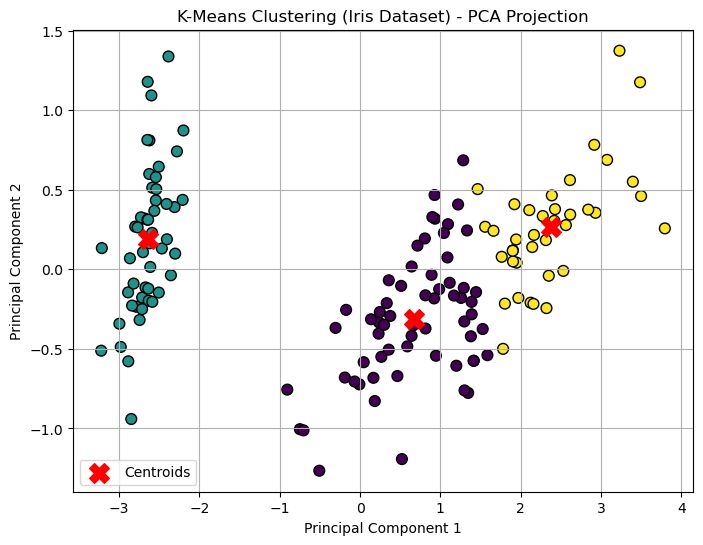

In [7]:
# Step 5: Visualize clusters (2D Graph using PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=60, edgecolor='k')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering (Iris Dataset) - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()